## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

In [0]:

#The data is already processed with the Column name replacement and removing the last empty row.

import numpy as np
import os 
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
from   sklearn.metrics import  mean_squared_error


#### Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [3]:
os.listdir('.') 

['.config', 'drive', 'sample_data']

In [0]:
path="/content/drive/My Drive/Colab Notebooks/Residency9/"
os.chdir(path)

In [5]:
!ls

daily-minimum-temperatures-in-me.csv
daily-minimum-temperatures-in-me.gsheet
time_series_prediction_lstm_melbourne_daily_temprature_data_questions.ipynb


### Load your data file

In [6]:
df=pd.read_csv('daily-minimum-temperatures-in-me.csv',index_col="Date")
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [7]:
df.shape

(3650, 1)

#### Plot data

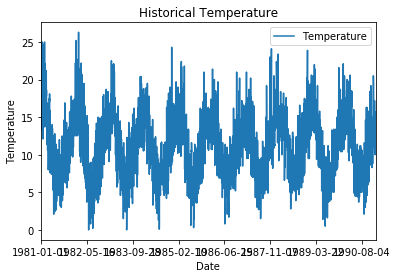

In [8]:
df.plot()
plt.ylabel('Temperature')
plt.title('Historical Temperature')
plt.show()


#### Descibe your dataframe

In [9]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


There are 3650 records in this data, with mean 11.18 and no null values.  The minimum temparature is 0 and maximum temparature is 26.3 

#### Check for null values

In [10]:
df.isnull().any().sum()

0

#### Drop null values

There are no null values in the dataset

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10dfbc87b8>]],
      dtype=object)

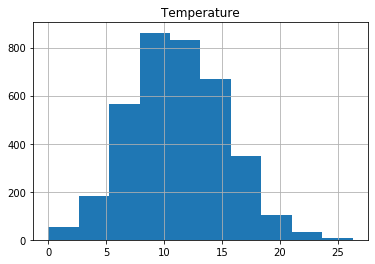

In [11]:
df.hist()

the data is right skewed


#### Check the maximum and minimum values

In [12]:
print("Maximum Temparature is : " ,np.max(df))
print("Minimum Temparature is : ", np.min(df))

Maximum Temparature is :  Temperature    26.3
dtype: float64
Minimum Temparature is :  Temperature    0.0
dtype: float64


### Normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
dataset = df.astype("float32")
sclaer=MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

In [15]:
for i in range(5):
	print(scaled[i])


[0.7870723]
[0.68060837]
[0.71482889]
[0.55513311]
[0.60076048]


In [16]:
# inverse transform and print the first 5 rows to cross verify.
inversed = scaler.inverse_transform(scaled)
for i in range(5):
	print(inversed[i])

[20.70000076]
[17.89999962]
[18.79999924]
[14.60000038]
[15.80000019]


#### Check the maximum and minimum values of scaled data

In [17]:
print("Max value ",scaled.max(), "and actual Maximum value was : ",inversed.max())
print("Min value ",scaled.min(), "and actual Minimum value was : ",inversed.min())

Max value  1.0 and actual Maximum value was :  26.299999237060547
Min value  0.0 and actual Minimum value was :  0.0


#### Look into some of the scaled values

In [18]:
for i in range(10):
	print(scaled[i])


[0.7870723]
[0.68060837]
[0.71482889]
[0.55513311]
[0.60076048]
[0.60076048]
[0.60076048]
[0.66159696]
[0.82889733]
[0.7604563]


### Split data into Training and Testing

In [0]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

#### Print train and test size

In [20]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [22]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2555 1
1095 1


#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


### Summarize your model

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [26]:
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





2553/2553 [==============================] - 4s 2ms/step - loss: 0.0203
Epoch 2/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0151
Epoch 3/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0130
Epoch 4/10
2553/2553 [==============================] - 4s 1ms/step - loss: 0.0120
Epoch 5/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0110
Epoch 6/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0105
Epoch 7/10
2553/2553 [==============================] - 4s 1ms/step - loss: 0.0103
Epoch 8/10
2553/2553 [==============================] - 4s 1ms/step - loss: 0.0102
Epoch 9/10
2553/2553 [==============================] - 4s 2ms/step - loss: 0.0102
Epoch 10/10
2553/2553 [==============================] - 4s 1ms/step - loss: 0.0102


## Make Predictions and Evaluate your model

In [27]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(X_test, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.62 RMSE
Test Score: 2.46 RMSE


## Plot the results

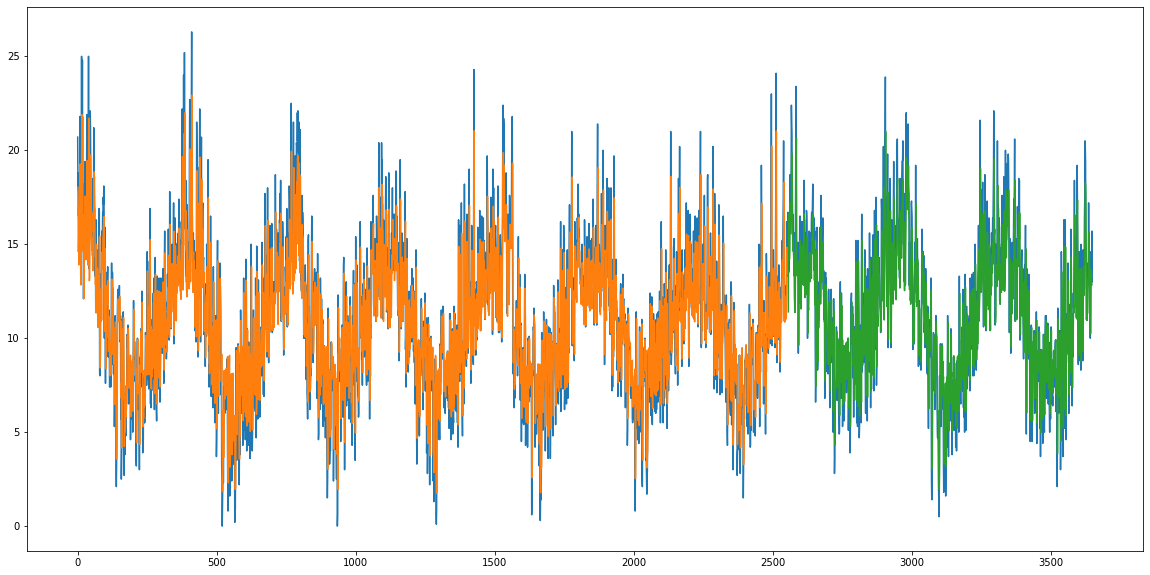

In [28]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()